In [2]:
import pandas as pd

# replace filename with your actual CSV name if different
df = pd.read_csv("data/PlayersFBREF.csv")

df.head()


,Unnamed: 0,Player,Nation,Position,Age,Matches Played,Starts,Minutes,90s Played,Goals,...,Goals Per 90,Assists Per 90,Goals + Assists Per 90,Non-Penalty Goals Per 90,Non-Penalty Goals + Assists Per 90,xG Per 90,xAG Per 90,xG + xAG Per 90,npxG Per 90,npxG + xAG Per 90
0,0,Mohamed Salah,EGY,AT,32,38,38,"3,371",37.5,29,...,0.77,0.48,1.25,0.53,1.01,0.67,0.38,1.05,0.49,0.87
1,1,Virgil van Dijk,NED,DF,33,37,37,"3,330",37.0,3,...,0.08,0.03,0.11,0.08,0.11,0.06,0.02,0.08,0.06,0.08
2,2,Ryan Gravenberch,NED,MT,22,37,37,"3,160",35.1,0,...,0.00,0.11,0.11,0.00,0.11,0.03,0.09,0.12,0.03,0.12
3,3,Alexis Mac Allister,ARG,MT,25,35,30,"2,599",28.9,5,...,0.17,0.17,0.35,0.17,0.35,0.10,0.16,0.26,0.10,0.26
4,4,Ibrahima Konaté,FRA,DF,25,31,30,"2,560",28.4,1,...,0.04,0.07,0.11,0.04,0.11,0.06,0.03,0.10,0.06,0.10


In [3]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          2274 non-null   int64  
 1   Player                              2274 non-null   object 
 2   Nation                              2274 non-null   object 
 3   Position                            2274 non-null   object 
 4   Age                                 2274 non-null   int64  
 5   Matches Played                      2274 non-null   int64  
 6   Starts                              2274 non-null   int64  
 7   Minutes                             2274 non-null   object 
 8   90s Played                          2274 non-null   float64
 9   Goals                               2274 non-null   int64  
 10  Assists                             2274 non-null   int64  
 11  Goals + Assists                     2274 no

Index(['Unnamed: 0', 'Player', 'Nation', 'Position', 'Age', 'Matches Played',
       'Starts', 'Minutes', '90s Played', 'Goals', 'Assists',
       'Goals + Assists', 'Non-Penalty Goals', 'Penalty Goals Made',
       'Penalty Attempts', 'Yellow Cards', 'Red Cards', 'xG', 'npxG', 'xAG',
       'npxG + xAG', 'Progressive Carries', 'Progressive Passes',
       'Progressive Receives', 'Goals Per 90', 'Assists Per 90',
       'Goals + Assists Per 90', 'Non-Penalty Goals Per 90',
       'Non-Penalty Goals + Assists Per 90', 'xG Per 90', 'xAG Per 90',
       'xG + xAG Per 90', 'npxG Per 90', 'npxG + xAG Per 90'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,Age,Matches Played,Starts,90s Played,Goals,Assists,Goals + Assists,Non-Penalty Goals,Penalty Goals Made,...,Goals Per 90,Assists Per 90,Goals + Assists Per 90,Non-Penalty Goals Per 90,Non-Penalty Goals + Assists Per 90,xG Per 90,xAG Per 90,xG + xAG Per 90,npxG Per 90,npxG + xAG Per 90
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,...,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000
mean,1136.500000,25.094987,19.226913,14.313105,14.202331,1.566403,1.096746,2.663149,1.434037,0.132366,...,0.096486,0.063602,0.160048,0.089943,0.153514,0.115391,0.075853,0.191042,0.108672,0.184415
std,656.591578,4.465810,11.519163,11.512175,10.968616,3.124944,1.880588,4.497444,2.767307,0.658344,...,0.182532,0.104213,0.234581,0.173435,0.224508,0.185577,0.112750,0.236506,0.177073,0.227744
min,0.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,568.250000,22.000000,9.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.040000,0.010000,0.040000
50%,1136.500000,25.000000,20.000000,12.000000,12.300000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.060000,0.000000,0.060000,0.050000,0.040000,0.120000,0.050000,0.110000
75%,1704.750000,28.000000,30.000000,25.000000,23.900000,2.000000,1.000000,3.000000,2.000000,0.000000,...,0.120000,0.100000,0.240000,0.110000,0.230000,0.140000,0.110000,0.280000,0.140000,0.260000
max,2273.000000,41.000000,38.000000,38.000000,38.000000,29.000000,18.000000,47.000000,24.000000,9.000000,...,2.430000,1.010000,2.430000,2.430000,2.430000,3.530000,2.470000,3.530000,3.530000,3.530000


In [5]:
# 1) Choose the regression target: goals per 90 minutes
target_col = 'Goals Per 90'

# 2) Choose input features (no player name, no nation, etc.)
feature_cols = [
    'Age',
    '90s Played',
    'xG Per 90',
    'xAG Per 90',
    'xG + xAG Per 90',
    'npxG Per 90',
    'npxG + xAG Per 90',
    'Progressive Carries',
    'Progressive Passes',
    'Progressive Receives'
]

# 3) Build feature matrix X and target vector y
X = df[feature_cols]
y = df[target_col]

X.head(), y.head()

(   Age  90s Played  xG Per 90  xAG Per 90  xG + xAG Per 90  npxG Per 90  \
 0   32        37.5       0.67        0.38             1.05         0.49   
 1   33        37.0       0.06        0.02             0.08         0.06   
 2   22        35.1       0.03        0.09             0.12         0.03   
 3   25        28.9       0.10        0.16             0.26         0.10   
 4   25        28.4       0.06        0.03             0.10         0.06   
 
    npxG + xAG Per 90  Progressive Carries  Progressive Passes  \
 0               0.87                  154                 144   
 1               0.08                   22                 198   
 2               0.12                   70                 181   
 3               0.26                   36                 177   
 4               0.10                   25                 115   
 
    Progressive Receives  
 0                   488  
 1                     6  
 2                    55  
 3                    80  
 4       

In [6]:
X.isna().sum(), y.isna().sum()

(Age                     0
 90s Played              0
 xG Per 90               0
 xAG Per 90              0
 xG + xAG Per 90         0
 npxG Per 90             0
 npxG + xAG Per 90       0
 Progressive Carries     0
 Progressive Passes      0
 Progressive Receives    0
 dtype: int64,
 0)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((1819, 10), (455, 10))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (1819, 10)
Test set shape: (455, 10)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1) Create and train the model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# 2) Make predictions on the test set
y_pred = reg.predict(X_test_scaled)

# 3) Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.07425062613076365
RMSE: 0.17489089296916596
R²: 0.3676856993234504


In [13]:
import pandas as pd

coef_df = pd.DataFrame({
    'feature': feature_cols,
    'coefficient': reg.coef_
}).sort_values(by='coefficient', ascending=False)

coef_df

,feature,coefficient
6,npxG + xAG Per 90,0.450027
2,xG Per 90,0.371954
9,Progressive Receives,0.066476
1,90s Played,0.008792
0,Age,0.000621
8,Progressive Passes,-0.004720
7,Progressive Carries,-0.028700
3,xAG Per 90,-0.133733
4,xG + xAG Per 90,-0.187060
5,npxG Per 90,-0.480194


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Create and train Random Forest
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

rf.fit(X_train, y_train)  # Note: Random Forest doesn't need scaling!

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

Random Forest Results:
MAE: 0.0680787960622808
RMSE: 0.18551122393346806
R²: 0.28855882729596827


In [15]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae, mae_rf],
    'RMSE': [rmse, rmse_rf],
    'R²': [r2, r2_rf]
})

comparison

,Model,MAE,RMSE,R²
0,Linear Regression,0.074251,0.174891,0.367686
1,Random Forest,0.068079,0.185511,0.288559


In [16]:
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance

,feature,importance
2,xG Per 90,0.607692
1,90s Played,0.108027
9,Progressive Receives,0.064503
7,Progressive Carries,0.037448
8,Progressive Passes,0.036958
5,npxG Per 90,0.036791
4,xG + xAG Per 90,0.033770
3,xAG Per 90,0.031201
0,Age,0.022871
6,npxG + xAG Per 90,0.020741


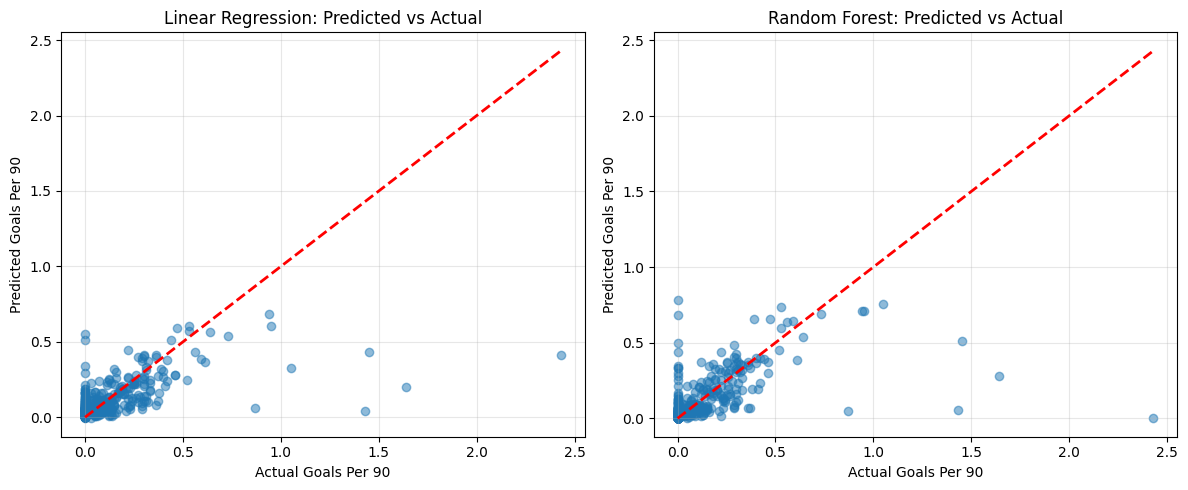

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Linear Regression predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Goals Per 90')
plt.ylabel('Predicted Goals Per 90')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True, alpha=0.3)

# Random Forest predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Goals Per 90')
plt.ylabel('Predicted Goals Per 90')
plt.title('Random Forest: Predicted vs Actual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

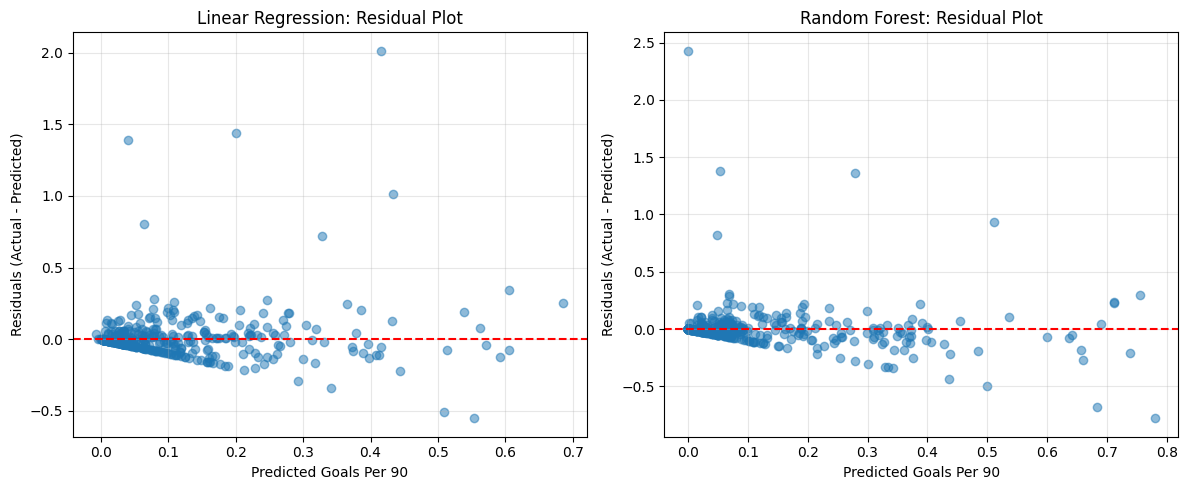

In [18]:
plt.figure(figsize=(12, 5))

# Linear Regression residuals
plt.subplot(1, 2, 1)
residuals_lr = y_test - y_pred
plt.scatter(y_pred, residuals_lr, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Goals Per 90')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Linear Regression: Residual Plot')
plt.grid(True, alpha=0.3)

# Random Forest residuals
plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Goals Per 90')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Random Forest: Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

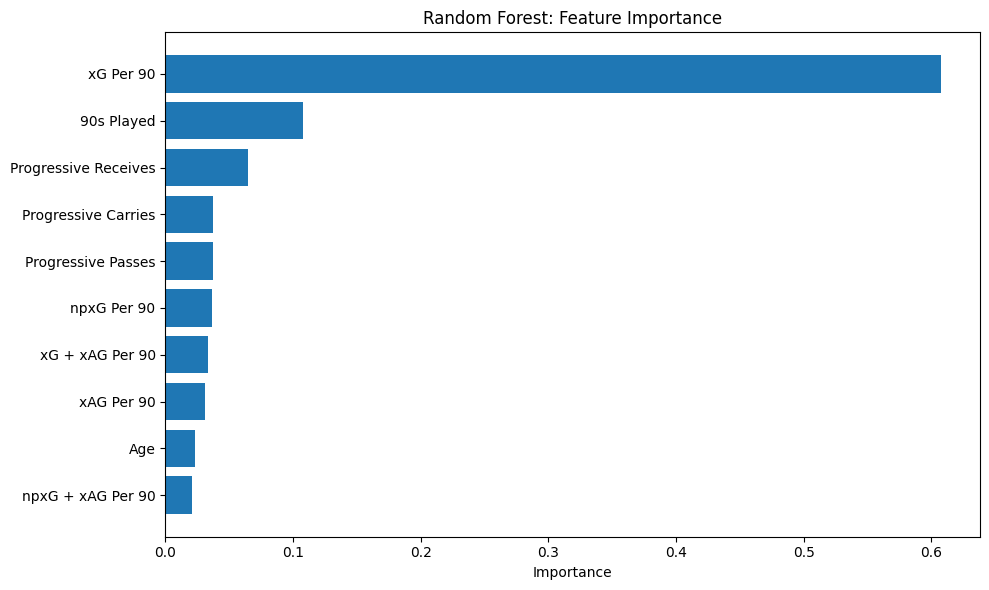

In [19]:
plt.figure(figsize=(10, 6))

# Get feature importance from Random Forest
rf_importance = feature_importance.sort_values(by='importance', ascending=True)

plt.barh(rf_importance['feature'], rf_importance['importance'])
plt.xlabel('Importance')
plt.title('Random Forest: Feature Importance')
plt.tight_layout()
plt.show()

In [20]:
# Create a results dataframe
results_df = pd.DataFrame({
    'Actual_Goals_Per_90': y_test.values,
    'Predicted_LR': y_pred,
    'Predicted_RF': y_pred_rf,
    'Error_LR': residuals_lr,
    'Error_RF': residuals_rf
})

results_df.to_csv('data/predictions_results.csv', index=False)
print("Predictions saved to data/predictions_results.csv")

Predictions saved to data/predictions_results.csv
